<a href="https://colab.research.google.com/github/24GUNV/LicensePlateDetector/blob/main/LicensePlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unzipping data to data folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

os.mkdir("/content/data", 0o666)

with zipfile.ZipFile("/content/drive/MyDrive/AI/LicensePlateData/LicensePlate.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data")

Parsing all of the info into a pd dataframe

In [ ]:
import glob
import shutil
import xml.etree.cElementTree as ET
import pandas as pd
import random
import os

Converting png to jpg cuz TFLite doesn't support png

In [ ]:
from pathlib import Path
from PIL import Image


inputPath = Path("/content/data/images")
inputFiles = inputPath.glob("**/*.png")
outputPath = Path("/content/data/imagesClean")

os.mkdir(outputPath, 0o666)

for f in inputFiles:
    outputFile = outputPath / Path(f.stem + ".jpg")
    im = Image.open(f)
    rgb_im = im.convert('RGB')
    rgb_im.save(outputFile)

In [ ]:
# Parse info from the files to a train folder
valid_fnames = os.listdir("data/annotations");

df = pd.DataFrame(columns=["type", "filename", "name", "left", "top", "right", "top", "right", "bottom", "left", "bottom"])

# Looping through all of the files
for i, file in enumerate(valid_fnames):
  # Checks if it is an xml file or not
  try:
    # Parse into the lists
    tree = ET.parse("data/annotations/" + file)
    root = tree.getroot()
    filename = ''.join(["data/imagesClean/"] + list(file.split(".")[:-1]) + [".jpg"])
    name = "License Plate"
    width = int(root[2][0].text)
    height = int(root[2][1].text)
    left = int(root[4][5][0].text) / width
    top = int(root[4][5][1].text) / height
    right = int(root[4][5][2].text) / width
    bottom = int(root[4][5][3].text) / height

    if i < 0.8 * len(valid_fnames):
      df.loc[i]=["TRAINING", filename, name, left, top, right, top, right, bottom, left, bottom]
    elif i < 0.9* len(valid_fnames):
      df.loc[i]=["VALIDATION", filename, name, left, top, right, top, right, bottom, left, bottom]
    else:
      df.loc[i]=["TEST",filename, name, left, top, right, top, right, bottom, left, bottom]
  except:
    continue

In [ ]:
print(df)

         type                      filename           name      left  \
0    TRAINING  data/imagesClean/Cars135.jpg  License Plate  0.650000   
1    TRAINING  data/imagesClean/Cars178.jpg  License Plate  0.420000   
2    TRAINING  data/imagesClean/Cars120.jpg  License Plate  0.397500   
3    TRAINING  data/imagesClean/Cars109.jpg  License Plate  0.287500   
4    TRAINING  data/imagesClean/Cars227.jpg  License Plate  0.295000   
..        ...                           ...            ...       ...   
428      TEST  data/imagesClean/Cars349.jpg  License Plate  0.095000   
429      TEST   data/imagesClean/Cars20.jpg  License Plate  0.045000   
430      TEST  data/imagesClean/Cars276.jpg  License Plate  0.287500   
431      TEST  data/imagesClean/Cars133.jpg  License Plate  0.411667   
432      TEST   data/imagesClean/Cars90.jpg  License Plate  0.192500   

          top     right       top     right    bottom      left    bottom  
0    0.817778  0.797500  0.817778  0.797500  0.937778  0.65

In [ ]:
# Turns it into the csv
df.to_csv('data/test.csv', index=False)

Installing library to train model

In [ ]:
!pip uninstall -y tensorflow && pip install -q tensorflow==2.7.0
!sudo apt -y install libportaudio2
!pip install scann
!pip uninstall -y protobuf && pip install -q protobuf==3.19
!pip uninstall -y flatbuffers && pip install -q flatbuffers==1.12
!pip uninstall -y folium && pip install -q folium==0.2.1
!pip uninstall -y packaging && pip install -q packaging==20.9
# !pip uninstall -y tensorflow && pip install -q tensorflow==2.9.0
!pip install -q tflite-model-maker
!pip install -q pycocotools
!pip install -q opencv-python-headless==4.1.2.30
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 42.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 65.4 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Fetched 65.4 kB in 0s (176 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is inst

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-hub 0.13.0 requires protobuf>=3.19.6, but you have protobuf 3.19.0 which is incompatible.
googleapis-common-protos 1.59.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.19.0 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.19.0 which is incompatible.
google-cloud-language 2.6.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have pro

In [ ]:
# Importing libraries
import numpy as np
import os

# from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

from google.colab import output

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
# Initialize model
spec = model_spec.get('efficientdet_lite0')

In [ ]:
# Loads training data
train_data, validation_data, test_data = object_detector.DataLoader.from_csv('data/test.csv')

In [ ]:
# Starts training
model = object_detector.create(train_data, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=validation_data, epochs=50)
# Export the model
model.export(export_dir='.')
# Google colab output to alert you when it's done
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Epoch 1/50
43/43 [==============================] - 267s 5s/step - det_loss: 1.4589 - cls_loss: 0.8301 - box_loss: 0.0126 - reg_l2_loss: 0.0630 - loss: 1.5219 - learning_rate: 0.0090 - gradient_norm: 3.6570 - val_det_loss: 1.1339 - val_cls_loss: 0.6187 - val_box_loss: 0.0103 - val_reg_l2_loss: 0.0630 - val_loss: 1.1969
Epoch 2/50
43/43 [==============================] - 215s 5s/step - det_loss: 0.9938 - cls_loss: 0.5066 - box_loss: 0.0097 - reg_l2_loss: 0.0631 - loss: 1.0570 - learning_rate: 0.0100 - gradient_norm: 4.8042 - val_det_loss: 0.9795 - val_cls_loss: 0.5041 - val_box_loss: 0.0095 - val_reg_l2_loss: 0.0632 - val_loss: 1.0427
Epoch 3/50
43/43 [==============================] - 212s 5s/step - det_loss: 0.8780 - cls_loss: 0.4297 - box_loss: 0.0090 - reg_l2_loss: 0.0633 - loss: 0.9413 - learning_rate: 0.0099 - gradient_norm: 4.9193 - val_det_loss: 1.0331 - val_cls_loss: 0.5523 - val_box_loss: 0.0096 - val_reg_l2_loss: 0.0634 - val_loss: 1.0965
Epoch 4/50
43/43 [===================

Loading in Model to test it out

In [ ]:
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name
classes, label_map

[{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 127), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([127], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:1', 'index': 600, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 598, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'ze

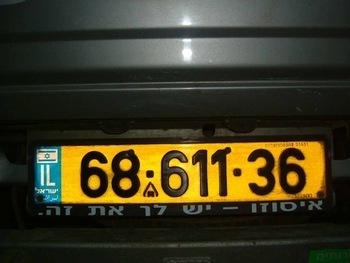

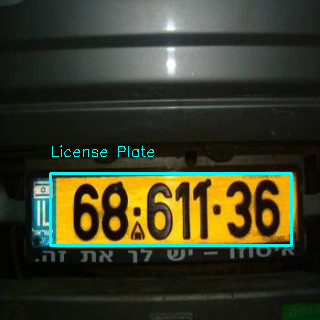

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="LicenseModel.tflite")

corresponding = {
    0: "License Plate"
}
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

# input details
print(input_details)
# output details
print(output_details)
for x in output_details:
  print(x)

img = cv2.imread("/content/data/imagesClean/Cars102.jpg")
new_img = cv2.resize(img, (320, 320))

# Create input tensor out of raw features
interpreter.set_tensor(input_details[0]['index'], [new_img])

# Run inference
interpreter.invoke()

# Gets detection outputs
detected_scores = np.squeeze(interpreter.get_tensor(output_details[0]['index']))
detected_classes = np.squeeze(interpreter.get_tensor(output_details[3]['index']))
detected_bbox = np.squeeze(interpreter.get_tensor(output_details[1]['index']))

# Print the results of inference
print(detected_bbox)
print(detected_classes)
print(detected_scores)

detection_threshold = 0.3

classes = []
for i, score in enumerate(detected_scores):
  if score >= detection_threshold:
    classes.append([score, "License Plate", [320 * detected_bbox[i][0], 320 * detected_bbox[i][1], 320 * detected_bbox[i][2], 320 * detected_bbox[i][3],]]) # corresponding[int(detected_classes[i])]
print(classes)

print(classes[0][2][1], classes[0][2][0], int(classes[0][2][3]), int(classes[0][2][2]))

x1 = int(classes[0][2][1])
y1 = int(classes[0][2][0])
x2 = int(classes[0][2][3])
y2 = int(classes[0][2][2])

cv2_imshow(img)
cv2.rectangle(new_img, (x1, y1), (x2, y2), (244, 246, 9), 2)

label = "License Plate"
label_size, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
label_x = x1
label_y = y1 - label_size[1] - 5
cv2.putText(new_img, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (244, 246, 9), 1)

cv2_imshow(new_img)


OCR Part

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (5,263 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
from PIL import Image
import pytesseract 
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
def OCR(y1, x1, y2, x2):
  # Cropping the image
  img1 = new_img[x1:x2, y1:y2]
  print("Original Image")
  cv2_imshow(img1)

  # Applying gray scale
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  print("Applying a gray scale")
  cv2_imshow(img1)

  # Removing slightly gray values
  lower_gray = 190
  upper_gray = 255
  mask_gray = cv2.inRange(img1, lower_gray, upper_gray)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
  mask_gray_closed = cv2.morphologyEx(mask_gray, cv2.MORPH_CLOSE, kernel)
  mask_not_gray = cv2.bitwise_not(mask_gray_closed)
  # img1 = img1.copy()
  img1[mask_not_gray == 0] = (255)

  print("After removing slighty gray value pixels")
  cv2_imshow(img1)

  
  # Resizing
  (h, w) = img1.shape[:2]
  img1 = cv2.resize(img1, (w*10, h*10))
  

  # Apply Gaussian blur
  img1 = cv2.GaussianBlur(img1,(9,9),0)
  print("Applied Gaussianblur")
  cv2_imshow(img1)
  

  # Apply Otsu’s Binarization
  ret3,th3 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  cv2.multiply(img1, 1.5)
  print("Applied Otsu’s Binarization")
  cv2_imshow(th3)

  text = pytesseract.image_to_string(img1, config="--psm 6")
  text = ''.join(c for c in text if c.isalnum()) # Removing non alphanumeric


  return "Text Detected + Filtered: " + text;

Original Image


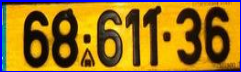

Applying a gray scale


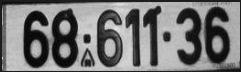

After removing slighty gray value pixels


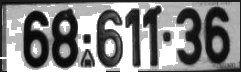

Applied Gaussianblur


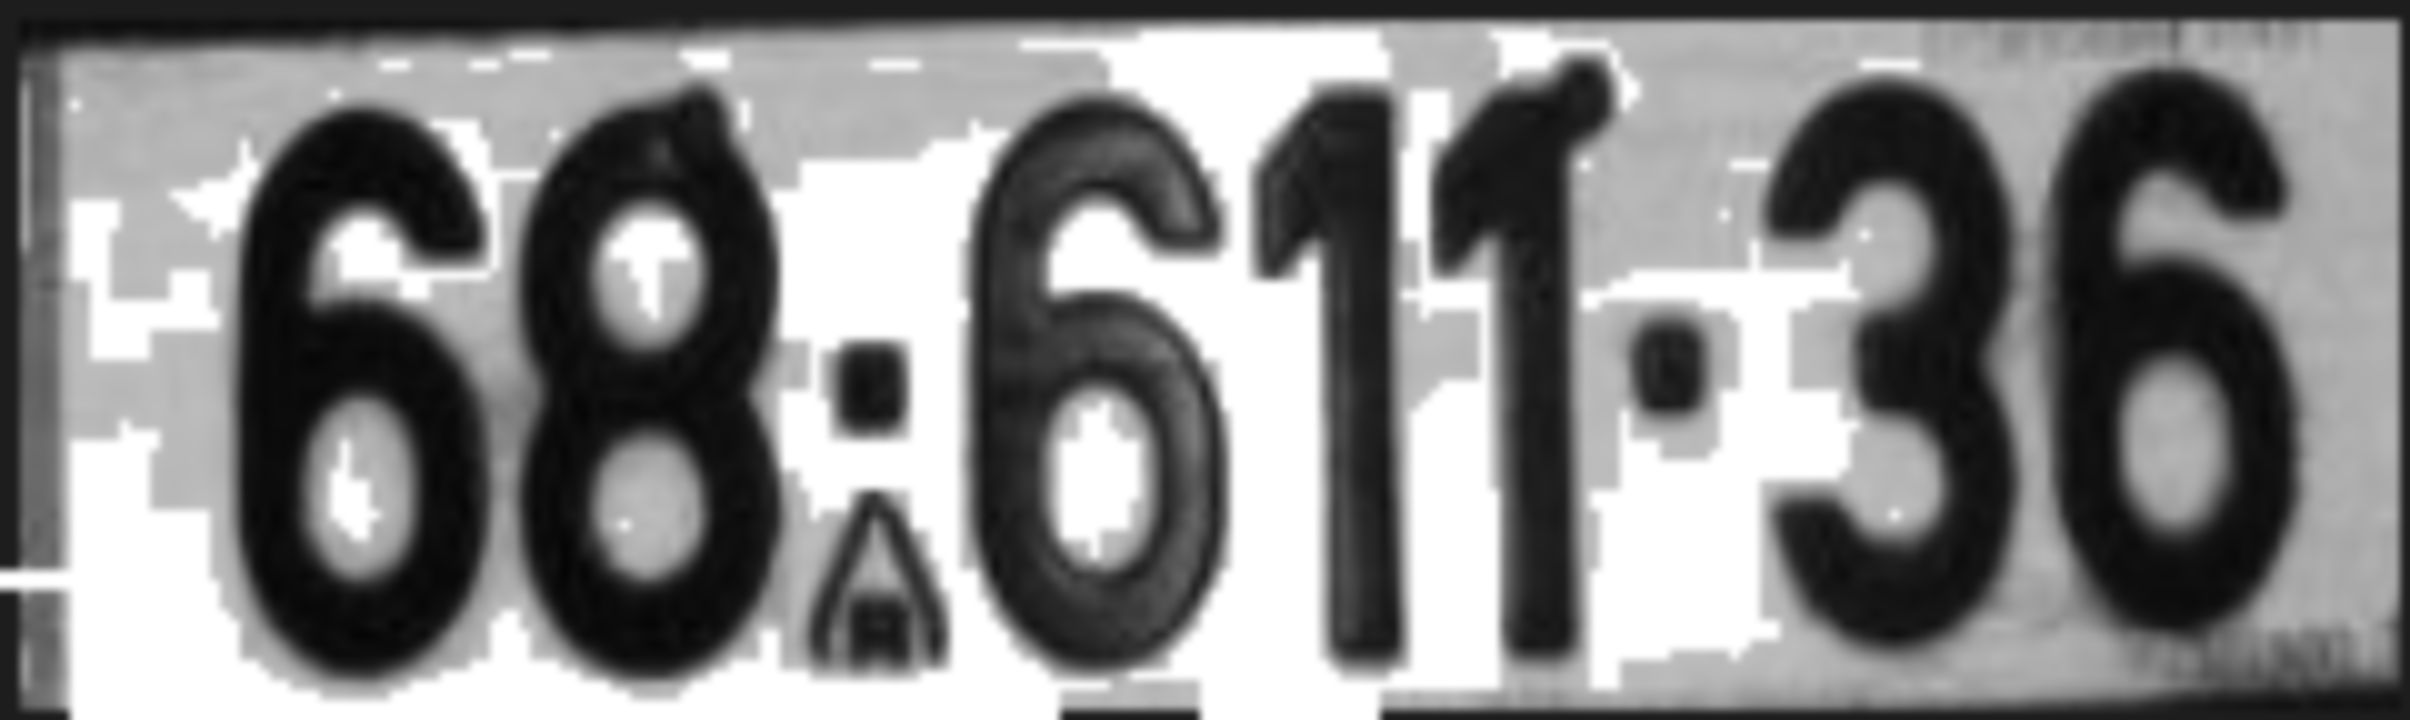

Applied Otsu’s Binarization


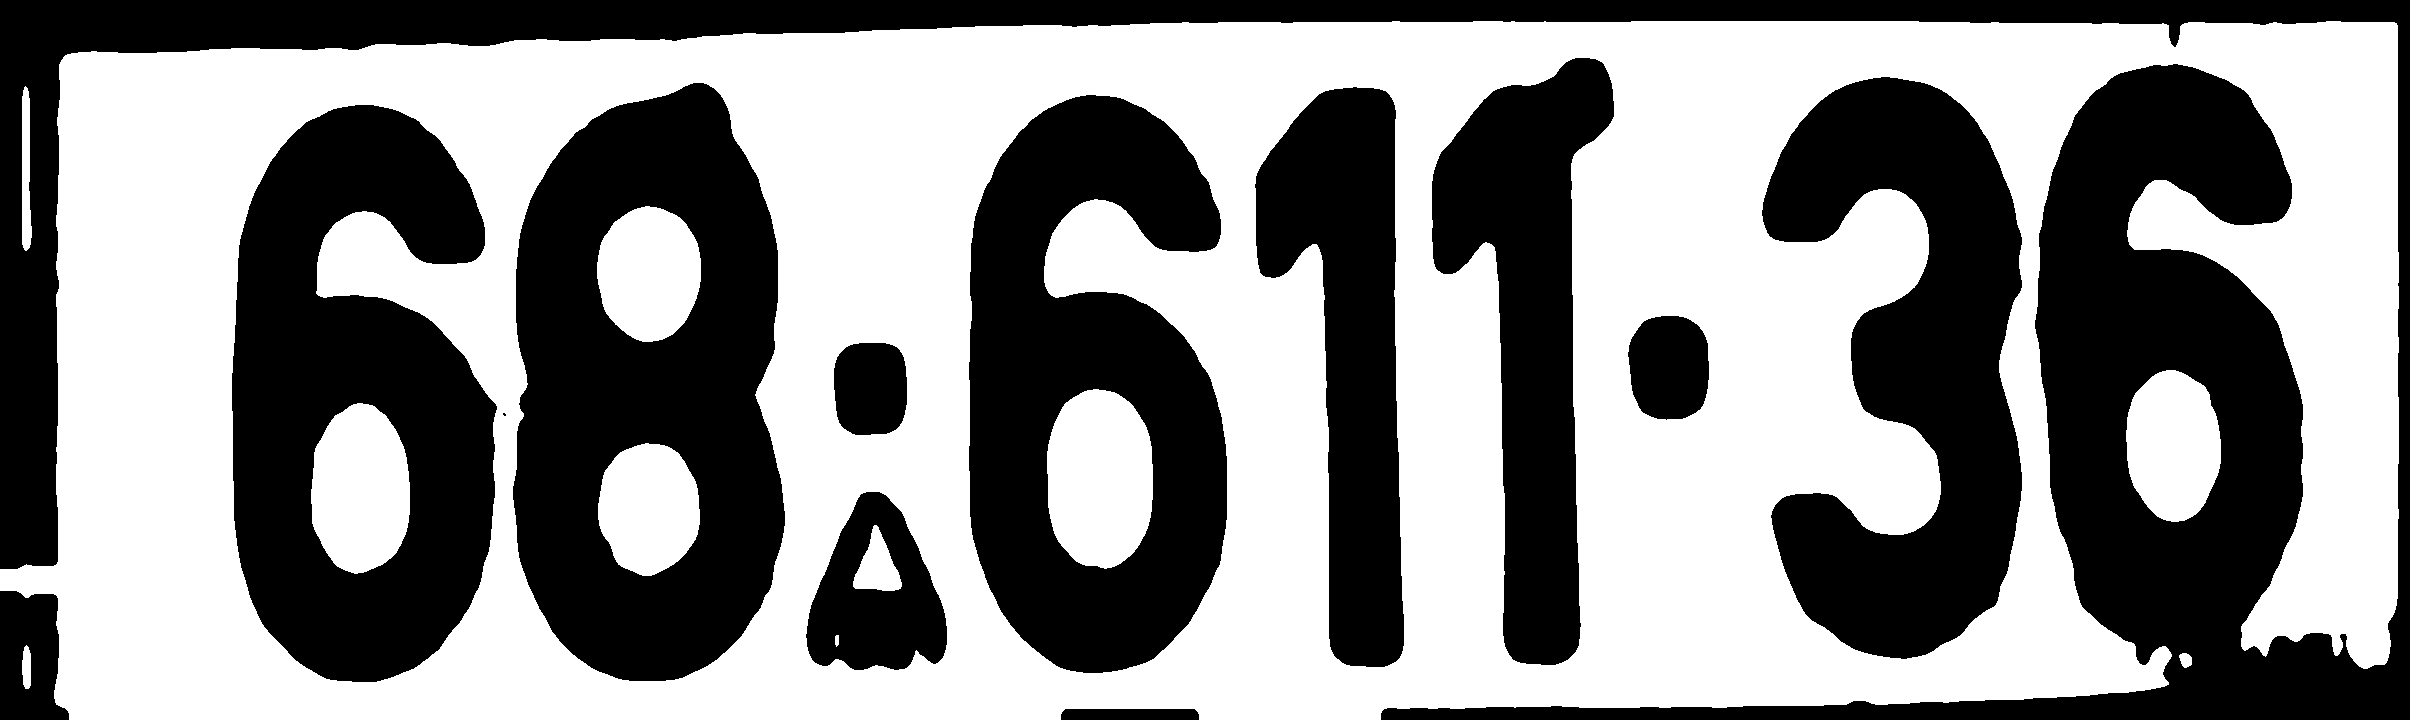

Text Detected + Filtered: 6861136


In [ ]:
print(OCR(int(classes[0][2][1]), int(classes[0][2][0]), int(classes[0][2][3]), int(classes[0][2][2])))